In [4]:
import pandas as pd
import random
# read the data from the downloaded CSV file.
data = pd.read_excel('HospitalDatabase.xlsx','Patients')

### Q2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200

In [23]:
data.iloc[101:200,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


###  Q5. Display full name of patients who are born in 1986

In [5]:
# reading dataofbirth column values
data['dob'] = data.DateOfBirth

In [6]:
# taking only the year details from column. To check whether my work is correct
data['year1'] = pd.DatetimeIndex(data['dob']).year

In [30]:
# Passing the condition and getting patient's details who born in 1986
data_1986['FullName'] = data['FirstName']+ ' ' + data['LastName'][pd.DatetimeIndex(data.DateOfBirth).year==1986]
data_1986['FullName'] 


C:\Users\kirut\AppData\Local\Temp\ipykernel_1256\2152677655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1986['FullName'] = data['FirstName']+ ' ' + data['LastName'][pd.DatetimeIndex(data.DateOfBirth).year==1986]


23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
Name: FullName, dtype: object

### Qno.14 To find the number of null values in BloodPressureSystolic column

In [8]:
# reading the Ambulatory Visits file to get BloodPressureSystolic column
df = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

In [9]:
#to check whether the column as null data
BP = df['BloodPressureSystolic'].isnull()
print(BP)

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: BloodPressureSystolic, Length: 950, dtype: bool


In [10]:
#to check how many null values in the column
BP = df['BloodPressureSystolic'].isnull().sum()
print(BP)

124


### we have 124 null values in BloodPressureSystolic column

### Qno.15 Replace all the null values in ReadmissionFlag with 0

In [11]:
# Reading the ReAdmissionRegistry
readmission = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')

In [12]:
# to check how many records has null values
readmissionflag = readmission['ReadmissionFlag'].isnull().sum()
print(readmissionflag)

526


In [13]:
#updating the null to zero
readmission['ReadmissionFlag'].fillna(value=0, inplace=True)

In [14]:
#checked whether all records got updated
readmissionflagupdated = readmission['ReadmissionFlag'].isnull().sum()
print(readmissionflagupdated)

0


In [15]:
#verified the output
readmission['ReadmissionFlag']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

### Qno 9 Get the list of patient ids which are not there in ReadmissionRegistry

In [24]:
#reading Patient id's from two data set data
dpatientid = data['PatientID']
readmissionid = readmission['PatientID'].drop_duplicates()

In [25]:
# Patient id not readmitted
Patinentid_nt = dpatientid[~dpatientid.isin(readmissionid)].dropna()

In [26]:
print(Patinentid_nt.count())

241


In [27]:
# patient id not readmitted
print(Patinentid_nt) 

3        4
134    135
144    145
188    189
199    200
      ... 
940    941
941    942
942    943
943    944
944    945
Name: PatientID, Length: 241, dtype: int64


### Q19 Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [12]:
import pandas as pd
# reading the discharge date from ReAdmissionRegistry sheet
require_cols = [3]
discharge_dt = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry',usecols = require_cols)
discharge_dt['DischargeDate']

0     2018-01-04 19:59:31.391
1     2018-01-04 21:28:51.898
2     2018-01-04 22:28:23.672
3     2018-01-05 05:47:04.933
4     2018-01-05 14:18:30.029
                ...          
715   2018-03-07 21:22:10.061
716   2018-03-08 02:43:18.749
717   2018-03-08 09:27:18.377
718   2018-03-10 06:06:12.068
719   2018-03-10 20:38:30.568
Name: DischargeDate, Length: 720, dtype: datetime64[ns]

In [18]:
# splitting date and time from the column discharge date
discharge_dt['Dates']=pd.to_datetime(discharge_dt['DischargeDate']).dt.date
discharge_dt['Time']=pd.to_datetime(discharge_dt['DischargeDate']).dt.time
discharge_dt

,DischargeDate,Dates,Time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


### Q10. Create a boxplot on ExpectedLOS by taking service into account

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
Readmission_df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

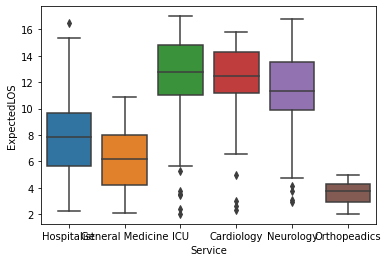

In [27]:
sns.boxplot(x='Service',y='ExpectedLOS',data=Readmission_df)

### Understandings: Expected LOS is less for Orthopeadics and more for ICU. We see Outliers in 4 type of services (hospitality,ICU,cardiology,neurology)

### Q13. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x  with 2 rows & 2 columns with object oriented approach

In [28]:
import numpy as np
import matplotlib.pyplot as plt

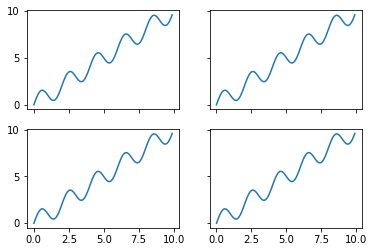

In [45]:
x = np.arange(0,10,0.1)
y = np.sin(np.pi * x) + x

fig, axes = plt.subplots(2, 2,sharex='col', 
                       sharey='row')
for row in range(rows):
    for col in range(cols):
        axes[row, col].plot(x,y)
plt.show()        

### Q22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

In [136]:
# reading the data

edvisits_df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

In [61]:
# used groupby() to get the count of patients and writing it to dataframe
data= edvisits_df.groupby(['EDDisposition','Acuity'],as_index=False)['PatientID'].count()
count_patient_df = pd.DataFrame(data)

In [62]:
# setting index on EDDisposition and Acuity
count_patient_df = count_patient_df.set_index(['EDDisposition','Acuity'])

In [63]:
# printing the values
count_patient_df

PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30

In [65]:
count_patient_df_2= edvisits_df.groupby(['EDDisposition','Acuity'],as_index=True)['PatientID'].count()
count_patient_df_2

EDDisposition  Acuity
Admitted       1          32
               2         116
               3          81
               4         107
               5         179
Discharged     1         558
               2          66
               4          30
               5          30
Name: PatientID, dtype: int64

### Q25. Plot a graph by counting the no. of patients in each department

In [93]:

ambulatoryvisit_df = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')


Text(0, 0.5, '# of patients')

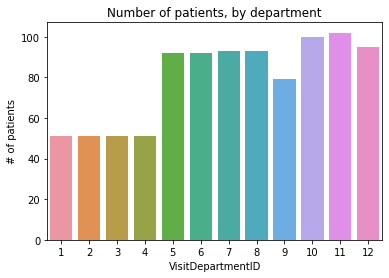

In [113]:
sns.countplot(x='VisitDepartmentID',data = ambulatoryvisit_df)
plt.title('Number of patients, by department')
plt.ylabel('# of patients')

### Q27 Plot a graph to count the patients based on discharge disposition

Text(0, 0.5, '# of patients')

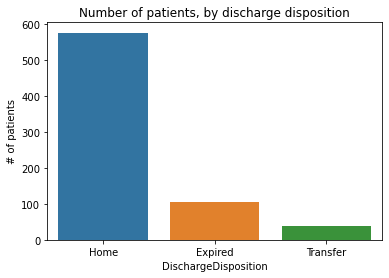

In [114]:
sns.countplot(x='DischargeDisposition',data =Readmission_df)
plt.title('Number of patients, by discharge disposition')
plt.ylabel('# of patients')

### Q31. Find count of White Spanish Male

In [99]:
patients_df =  pd.read_excel('HospitalDatabase.xlsx','Patients')

Text(0, 0.5, '# of patients')

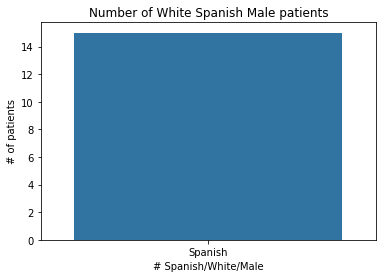

In [115]:
sns.countplot(x='Language',data =patients_df[(patients_df.Gender == 'Male') & (patients_df.Race =='White') &(patients_df.Language == 'Spanish') ] )
plt.title('Number of White Spanish Male patients')
plt.xlabel('# Spanish/White/Male')
plt.ylabel('# of patients')

### the Graph Shows we have 15 Patients who are White Spanish Male

In [112]:
patients_df[(patients_df.Gender == 'Male') & (patients_df.Race =='White') &(patients_df.Language == 'Spanish') ].count()

PatientID      15
FirstName      15
LastName       15
DateOfBirth    15
Gender         15
Race           15
Language       15
dtype: int64

### Verified the answer by quering the data frame.

### Q33. Using a bar chart, which Service had the lowest count of Expected Mortality?

In [18]:
from numpy import count_nonzero
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2520x576 with 0 Axes>

Text(0.5, 1.0, 'count of ExpectedMortality by services')

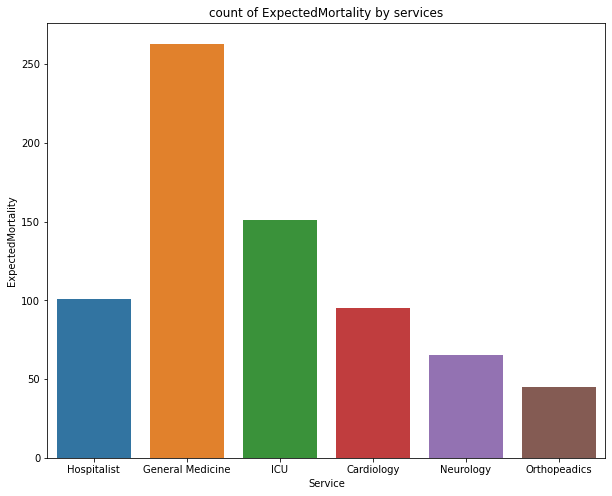

In [25]:
plt.figure(figsize = (10,8))
sns.barplot(x='Service', y ='ExpectedMortality', data = Readmission_df, estimator= count_nonzero)
plt.title('count of ExpectedMortality by services')


### from the above bar chart we come to know Orthopeadics Service had the lowest count of Expected Mortality

### Q36 Create a correlation matrix on EDVisits

In [146]:
edvisits_df['EDDisposition'] = np.where((edvisits_df.EDDisposition == 'Admitted'),1,0)
edvisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,1
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,1
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,1
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,1
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,1
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,0
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,0
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,0
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,0


In [150]:
cc=edvisits_df.corr()
cc

,EDVisitID,PatientID,Acuity,EDDisposition
EDVisitID,1.000000,0.975477,0.005813,0.006640
PatientID,0.975477,1.000000,0.003545,0.007777
Acuity,0.005813,0.003545,1.000000,0.675967
EDDisposition,0.006640,0.007777,0.675967,1.000000


### there is only 1 numeric column to find the correlation, so tried to change EDDispotion to numeric. from above correlation matrix we couldnt say which is correlated. but EDDispotion and Acuty is slightly correlated. 

In [157]:
edvisits_df['time difference'] =(edvisits_df['EDDischargeTime']-edvisits_df['VisitDate']).dt.total_seconds() / 60 / 60

In [158]:
edvisits_df

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,time difference
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,1,11.339701
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,1,23.238949
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,1,1.848931
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,1,1.336054
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,1,2.638901
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,0,15.885959
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,0,22.451119
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,0,4.500985
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,0,6.176404


In [159]:
edvisits_df.corr()

,EDVisitID,PatientID,Acuity,EDDisposition,time difference
EDVisitID,1.000000,0.975477,0.005813,0.006640,0.015873
PatientID,0.975477,1.000000,0.003545,0.007777,0.020262
Acuity,0.005813,0.003545,1.000000,0.675967,-0.033968
EDDisposition,0.006640,0.007777,0.675967,1.000000,-0.061439
time difference,0.015873,0.020262,-0.033968,-0.061439,1.000000


### tried to check correlation including length of stay but it is not correlated.EDDisposition & Acuity is slightly correlated.

### Q38. Number of patients on 'Transfer' based on primary diagnosis

Text(0, 0.5, '# of patients')

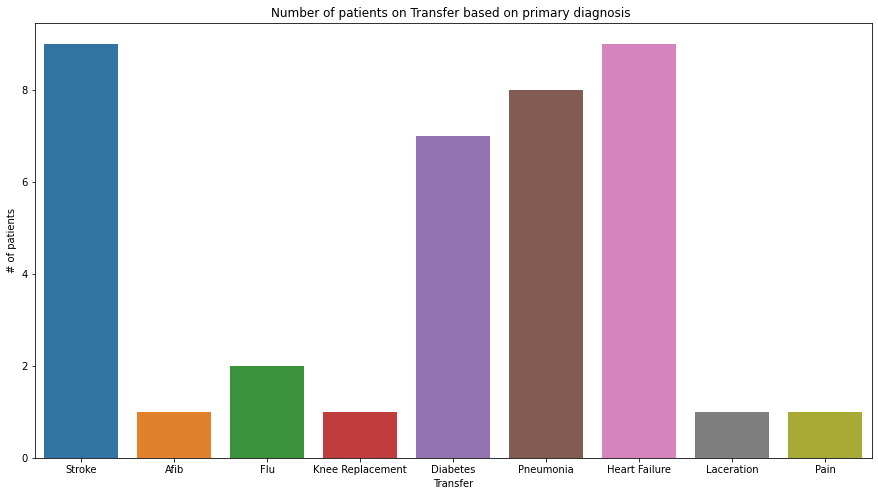

In [27]:
plt.figure(figsize = (15,8))
sns.countplot(x='PrimaryDiagnosis',data =Readmission_df[(Readmission_df.DischargeDisposition == 'Transfer')])
plt.title('Number of patients on Transfer based on primary diagnosis ')
plt.xlabel('Transfer')
plt.ylabel('# of patients')

### Q39.Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine

In [161]:
#reading data from EDUnique to get Patient_id's who has Migraine
EdVisits_unq =  pd.read_excel('HospitalDatabase.xlsx','EDUnique')

In [166]:
Pid_Migraine = EdVisits_unq['PatientID'][(EdVisits_unq.ReasonForVisit == 'Migraine') ]

In [179]:
# to display number of Patients who has Migraine and valided against data set
Pid_Migraine.count()

116

In [178]:
# Passing those Patient_id to Patient table and getting their details. 
patients_df.iloc[:,1:4][patients_df['PatientID'].isin(Pid_Migraine)]

,FirstName,LastName,DateOfBirth
1,Far,Myers,1985-11-15 02:08:42.090
2,Devlin,Michael,1976-04-15 02:52:09.762
11,Zonnya,Ab,1963-05-23 10:04:33.074
13,Gan,Yu,1970-06-02 06:22:54.675
21,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483
907,Knox,Group,1975-08-25 22:27:50.177
909,Kuvalis,Coupland,1986-05-23 19:23:27.752
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178


### Q30. Which patientid has most entries in readmission registry

<AxesSubplot:xlabel='count', ylabel='PatientID'>

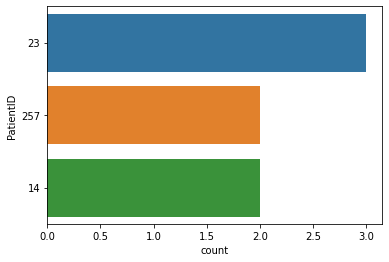

In [187]:
# used the count plot and ordered by value_counts() to get top 3 records.
sns.countplot(y='PatientID', data =Readmission_df, order= Readmission_df.PatientID.value_counts().iloc[:3].index)

#### From the above graph, PatientID 23 has most entries in readmission registry

In [51]:
import pandas as pd
Patient_id_most['PatientID'] = Readmission_df.groupby(['PatientID'])['AdmissionID'].count()
Patient_id_most['PatientID'][(Patient_id_most.PatientID != 1)]


PatientID
14     2
19     2
20     2
23     3
26     2
34     2
115    2
215    2
221    2
244    2
257    2
284    2
300    2
427    2
698    2
Name: AdmissionID, dtype: int64

### Checked the whether graph data is correct

### Q4.Display Data By splitting age in 4 quartiles and labeling the quartiles

In [52]:
patients_df =  pd.read_excel('HospitalDatabase.xlsx','Patients')

In [72]:
patients_df['Converted_dob']=patients_df['DateOfBirth'].dt.strftime("%d/%m/%Y")

In [ ]:
from datetime import datetime, date

In [77]:
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
patients_df['Age'] = patients_df['Converted_dob'].apply(age)
  
patients_df['Age']

0      62
1      36
2      46
3      53
4      60
       ..
940    35
941    51
942    39
943    58
944    49
Name: Age, Length: 945, dtype: int64

In [115]:
Quartile_Age =patients_df['Age'].quantile([ 0.25,  0.5, 0.75,1])
Quartile_Age

0.25    42.0
0.50    48.0
0.75    55.0
1.00    62.0
Name: Age, dtype: float64

In [126]:
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label

In [127]:
Quartile_Age

1st Quantile    42.0
2nd Quantile    48.0
3rd Quantile    55.0
4th Quantile    62.0
Name: Age, dtype: float64

### Q12.Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T


In [129]:
pip install psycopg2

In [130]:
import psycopg2 as pst


## conn=pst.connect("dbname='Hospital Database' user=postgres password =admin")

sqldata_df = pd.read_sql("""select * from "Providers" where ProviderName like 'T%'""",conn )
sqldata_df

### Since we didnt get a chance to attend classes we are not aware of conneting to postgress. We dont have local postgress. So gave the sql query, We are aware of how to do it.

## Q24. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions


In [166]:
 data = edvisits_df.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()


In [194]:
stack_df = pd.DataFrame(data)

Stack_pivot_df =stack_df.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot_df

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


In [195]:
Stack_pivot_df.stack()

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Fever                   46.0
               Gun Shot                16.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Bleeding                15.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Intoxication            30.0
               Laceration              30.0
               Migraine               109.0
               Pneumonia               65.0
               Shortness of Breath     77.0
               Stomach Ache           154.0
dtype: float64

In [196]:
stacked_df = Stack_pivot_df.stack()
stacked_df.unstack()

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


### Q28.Which reason of visit has maximum mortality rate


In [197]:
discarges_df =  pd.read_excel('HospitalDatabase.xlsx','Discharges')

In [229]:
Patient_count= discarges_df.groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
# this is to get total number of patients for each PrimaryDiagnosis
Patient_count

,PrimaryDiagnosis,PatientID
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


In [214]:
Expired_patient_count = discarges_df[(discarges_df.DischargeDisposition=='Expired')].groupby(['PrimaryDiagnosis'])['PatientID'].count()

In [215]:
Expired_patient_count

PrimaryDiagnosis
AMI                    6
Afib                   4
Broken Leg             3
Diabetes               9
Fever                  4
Flu                   11
Heart Failure         16
Hip Fracture           3
Hypertension          16
Kidney Failure         2
Knee Replacement       2
Laceration             2
Pain                   1
Pneumonia             16
Spinal Cord Injury     2
Stroke                 7
Name: PatientID, dtype: int64

In [232]:
Patient_count_df = pd.DataFrame(list(zip(Patient_count['PrimaryDiagnosis'],Patient_count['PatientID'],Expired_patient_count)),columns=['PrimaryDiagnosis','Total_count','Expired_count'])

In [233]:
Patient_count_df

,PrimaryDiagnosis,Total_count,Expired_count
0,AMI,48,6
1,Afib,11,4
2,Broken Leg,9,3
3,Diabetes,64,9
4,Fever,19,4
5,Flu,80,11
6,Heart Failure,78,16
7,Hip Fracture,23,3
8,Hypertension,50,16
9,Kidney Failure,20,2


In [239]:
Patient_count_df['Mortality_rate']=Patient_count_df['Expired_count']/Patient_count_df['Total_count']

In [240]:
Patient_count_df

,PrimaryDiagnosis,Total_count,Expired_count,Morality_rate,Mortality_rate
0,AMI,48,6,0.125000,0.125000
1,Afib,11,4,0.363636,0.363636
2,Broken Leg,9,3,0.333333,0.333333
3,Diabetes,64,9,0.140625,0.140625
4,Fever,19,4,0.210526,0.210526
5,Flu,80,11,0.137500,0.137500
6,Heart Failure,78,16,0.205128,0.205128
7,Hip Fracture,23,3,0.130435,0.130435
8,Hypertension,50,16,0.320000,0.320000
9,Kidney Failure,20,2,0.100000,0.100000


<AxesSubplot:xlabel='PrimaryDiagnosis', ylabel='Mortality_rate'>

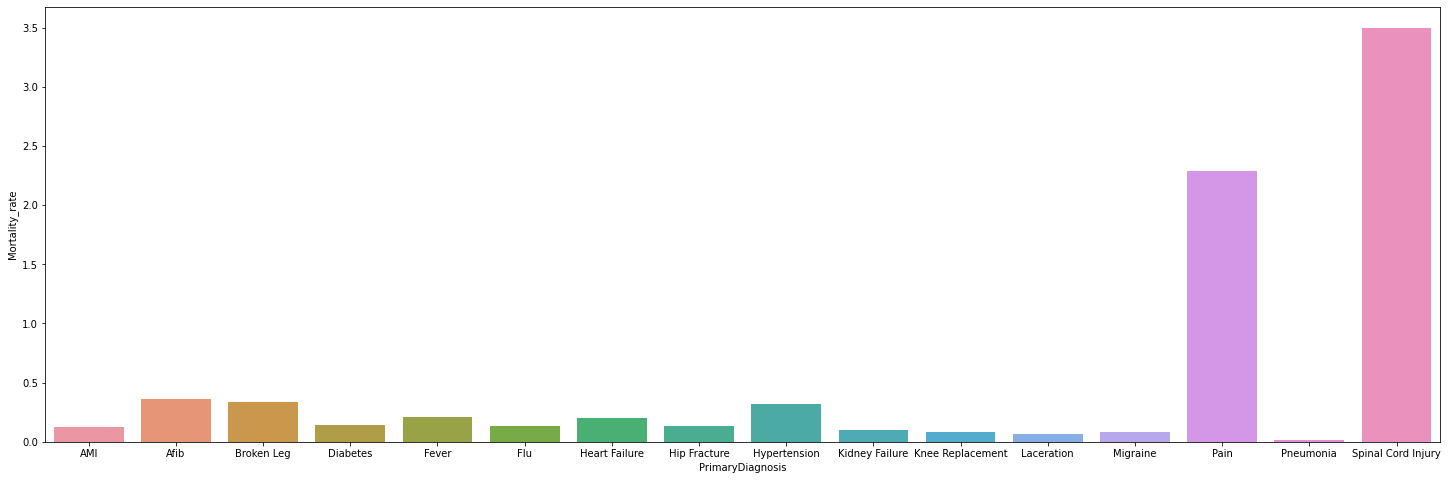

In [241]:
plt.figure(figsize = (25,8))
sns.barplot(x='PrimaryDiagnosis',y='Mortality_rate',data = Patient_count_df)

### Spinal Cord Injury has high Mortality rate